<a href="https://colab.research.google.com/github/vivek16pawar/EDA-CAPSTONE/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
# The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.

Discussion of Google play store dataset will involve various steps such as
1. loading the data into the data frame
2. cleaning the data
3. extracting statistics from the dataset
4. exploratory analysis and visualizations
5. questions that can be asked from the dataset
6. conclusion 

# **Step 1: Loading Dataset And Creating DataFrame**

In [426]:
# Importing all the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [428]:
# Defining the file path
file_path = '/content/drive/MyDrive/Module 1/EDA CAPSTON/ Play Store Data.csv'

In [429]:
# Creating data frame
df = pd.read_csv(file_path)

In [430]:
# Getting first 5 rows and all columns
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [431]:
# Getting last 5 rows and all columns
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [432]:
# Checking the shape of dataset
df.shape

(10841, 13)

In [433]:
# Getting information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Step 2: Cleaning the DataFrame**

In [434]:
# Checking all columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [435]:
# Droping irrelevant columns
df.drop(['Last Updated','Current Ver'], axis=1, inplace=True )

In [436]:
# Checking wheater columns are dropped or not
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Android Ver'],
      dtype='object')

In [437]:
# Drop if there are any duplicate in dataset
df.drop_duplicates(inplace=True)

In [438]:
# Check Shape after dropping duplicate
df.shape

(10356, 11)

In [439]:
# Checking the Null Value
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Android Ver          3
dtype: int64

In [440]:
# We cannot put zero for replacing null so we will check its stats
df.describe()

,Rating
count,8891.000000
mean,4.189551
std,0.545512
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [441]:
# Replacing null values with median of rating
df['Rating'].fillna((df['Rating'].median()), inplace=True)

In [442]:
# Checking unique values in Rating columns
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [443]:
# Dropping the 1.9 from category 
df.drop(df.loc[df['Category']=='1.9'].index, inplace=True)

In [444]:
# Checking the category after dropping 1.9
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [445]:
# Checking the install column for any improper values
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [446]:
# Dropping + and converting values to int
df=df[df['Installs']!='Free']
df['Installs']=df['Installs'].apply(lambda x : x.replace("+","") if "+" in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df["Installs"] = pd.to_numeric(df["Installs"])

In [447]:
# Checking install columns unique value
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10355, dtype: int64

In [448]:
# Checking Price Columns
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [449]:
# Removing $ symbol and converting to numerical
df['Price']=df['Price'].apply(lambda x : x.replace("$","") if "$" in str(x) else x)
df["Price"] = pd.to_numeric(df["Price"])

In [450]:
# Checking Price Columns after Altering
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [451]:
# Checking the size columns
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [452]:
# Convrting MB and Kb Values to float
try:
    df['Size']=df['Size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  float(x))
except BaseException as be:
    print("Check it again",be)

In [453]:
# Confirming the Size Column
df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [454]:
# Convert reviews column to numerical
df["Reviews"] = pd.to_numeric(df["Reviews"])

In [455]:
# Checking Review Column after convesion
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

# Step 3. Extracting statistics from the dataset

In [456]:
# Global size and color define for visualization
import plotly.express as px
from seaborn import colors
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)    
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)  


# (A) Univarent Analysis

In [457]:
# Getting the stastical data 
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10355.000000,1.035500e+04,8829.000000,1.035500e+04,10355.000000
mean,4.203747,4.059634e+05,21.289428,1.415856e+07,1.031000
std,0.485640,2.697035e+06,22.542040,8.024728e+07,16.280191
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.677000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.636100e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


<Figure size 864x576 with 0 Axes>

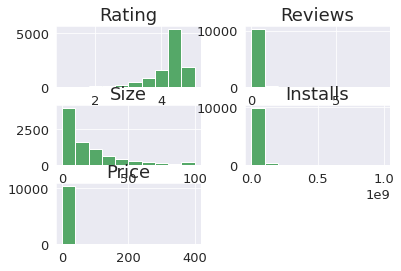

In [458]:
# Let's check the skeness of data.
plt.figure(figsize=(12,8), tight_layout=True)
df.hist(color=sns.color_palette('deep')[2])
plt.show()


# Step 4: Exploratory Data Analysis

# (B) Bivariate data 

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

 Getting Total Application in each category 

In [460]:
# Getting total apps in each category
category = df.groupby('Category')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [461]:
# Checking its columns
print(category.head(2))

   Category   App
11   FAMILY  1943
14     GAME  1121


In [462]:
# Writing code for plotting bar graph
px.bar(data_frame = category,x = category['Category'],y = category['App'],text ='App',title ='Total Application in each Category', color = 'Category' )

Geting Percentage Install in each category

In [480]:
# Geting Percentage Install in each category
cat_install = df.groupby('Category',as_index = False)['Installs'].sum().sort_values(by = 'Installs', ascending = False )
total_install = df['Installs'].sum()
cat_install['percentage_installs']=cat_install['Installs']*100/total_install
cat_install.head()

,Category,Installs,percentage_installs
14,GAME,31544024415,21.515321
6,COMMUNICATION,24152276251,16.473611
27,SOCIAL,12513867902,8.535369
25,PRODUCTIVITY,12463091369,8.500736
29,TOOLS,11442771915,7.804804


In [481]:
# Applying lambda function for proper formatting of values inside percentage installs upto 1 float point decimal
cat_install['percentage_installs']=cat_install['percentage_installs'].apply(lambda x: "{0:1.2f}%".format(x))

In [482]:
# Plotting Graph
px.bar(data_frame=cat_install,x="Category",y="Installs",text='percentage_installs',color='Installs',
       title='Most Installed Category in Percentage Installs (Categories Vs Installs)')

Category vs Review

In [476]:
# Geting Percentage Review in each category
cat_review = df.groupby('Category',as_index = False)['Reviews'].sum().sort_values(by ='Reviews', ascending = False)
total_review = df['Reviews'].sum()
cat_review['percentage_reviews']= cat_review['Reviews']*100/total_review
cat_review.head()

,Category,Reviews,percentage_reviews
14,GAME,1415536650,33.673177
6,COMMUNICATION,601273552,14.303261
27,SOCIAL,533576829,12.692873
11,FAMILY,396771969,9.438521
29,TOOLS,273050841,6.495409


In [478]:
# Applying lambda function for proper formatting of values inside percentage review upto 1 float point decimal
cat_review['percentage_reviews']=cat_review['percentage_reviews'].apply(lambda x: "{0:1.2f}%".format(x))

In [479]:
# Plotting Graph
px.bar(data_frame=cat_review,x="Category",y="Reviews",text='percentage_reviews',color='Reviews',
       title='Most Installed Category in Percentage Reviews (Categories Vs Reviews)')